# Most Streamed Spotify Songs 2023

In this exploratory data analysis (EDA), a dataset about the popular tracks on Most Streamed Spotify Songs 2023 is explored along with its various musical attributes and their relationship to popularity metrics like the number of streams. An initial exploration provided summary statistics, focusing on key features such as release dates, BPM, and danceability which helped understand the different features available. Through visualizations like bar charts and scatter plots, trends and patterns are uncovered that reveal insights into what makes a track successful. Finally, correlations between musical characteristics and streams are also investigated, offering recommendations to better understand the dynamics of popular music.

In the first part, the necessary libraries and the dataset is loaded in order to get the necessary information needed and an overview of the overall structure.

In [1]:
#Accessing Pandas, Matplotlib, and Seaborn libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The dataset is loaded and stored in variable named 'data'.
data = pd.read_excel('spotify-2023.xlsx')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview of Dataset

To answer the questions such as how many rows and columns are there in the dataset, data types of each column, and if there are any missing values, the functions 'data.shape', 'data.dtypes', and 'data.isnull().sum()' were used respectively.

In [3]:
#Prints and returns the shape of the data set.
print('The data set contains the following rows and columns, respectively:', data.shape)

The data set contains the following rows and columns, respectively: (953, 24)


In [4]:
#Prints and returns the data types of each column.
print('The data types of each column are: ')
data.dtypes

The data types of each column are: 


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [5]:
#Prints and returns the count of missing values for each column.
print('The count of missing values for each column are: ')
data.isnull().sum() 

The count of missing values for each column are: 


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

# Basic Descriptive Statistics

In this section, the mean, median, and standard deviation of the streams column, the distrubution of released_year and artist_year, and if there are any noticeable trends or outliers are identified. The functions 'pd.to_numeric', 'errors='coerce'', 'data['streams'].mean()', 'data['streams'].median()', and 'data['streams'].std()' were used to get the mean, median, and standard deviation of the streams column. On the other hand, 'plt.figure', 'sns.histplot', 'plt.title', 'plt.xlabel', 'plt.ylabel', 'sns.boxplot', and 'plt.xlabel' were mainly used to visualize the data.

In [6]:
#Convert the values in stream to a numeric type.
data['streams'] = pd.to_numeric(data['streams'], errors = 'coerce')

In [7]:
#Gets the mean of the streams column.
print('The mean of the streams column is', data['streams'].mean())

The mean of the streams column is 514137424.93907565


In [8]:
#Gets the median of the streams column.
print('The median of the streams column is', data['streams'].median())

The median of the streams column is 290530915.0


In [9]:
#Gets the standard deviation of the streams column.
print('The standard deviation of the streams column is', data['streams'].std())

The standard deviation of the streams column is 566856949.0388832


Text(0, 0.5, 'Tracks')

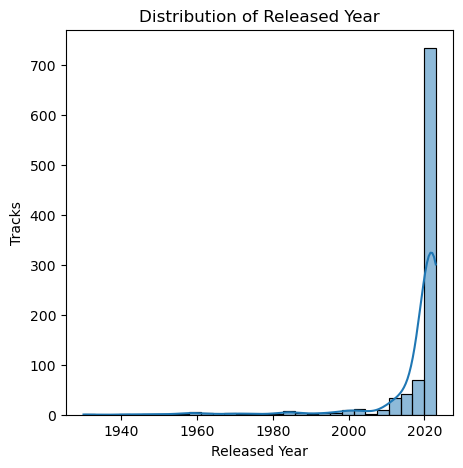

In [10]:
#Creates a histogram about the distribution of tracks per year.
plt.figure(figsize = (5, 5))
sns.histplot(data['released_year'], bins = 30, kde = True)
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Tracks')

Text(0, 0.5, 'Tracks')

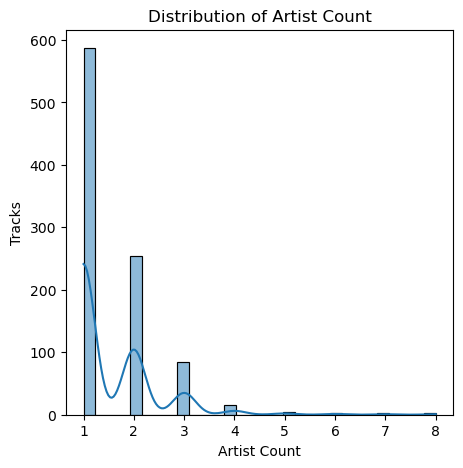

In [11]:
#Creates a histogram about the distribution of artist count per track.
plt.figure(figsize=(5, 5))
sns.histplot(data['artist_count'], bins=30, kde=True)
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Tracks')

Text(0.5, 0, 'Released Year')

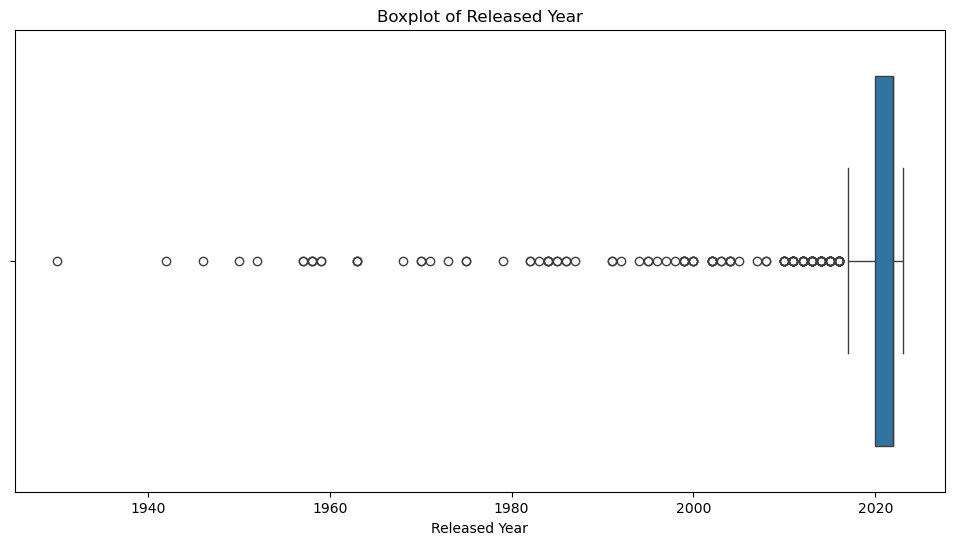

In [12]:
#Creates a boxplot about the distribution of tracks per year to see the outliers.
plt.figure(figsize = (12, 6))
sns.boxplot(x = data['released_year'])
plt.title('Boxplot of Released Year')
plt.xlabel('Released Year')

Text(0.5, 0, 'Artist Count')

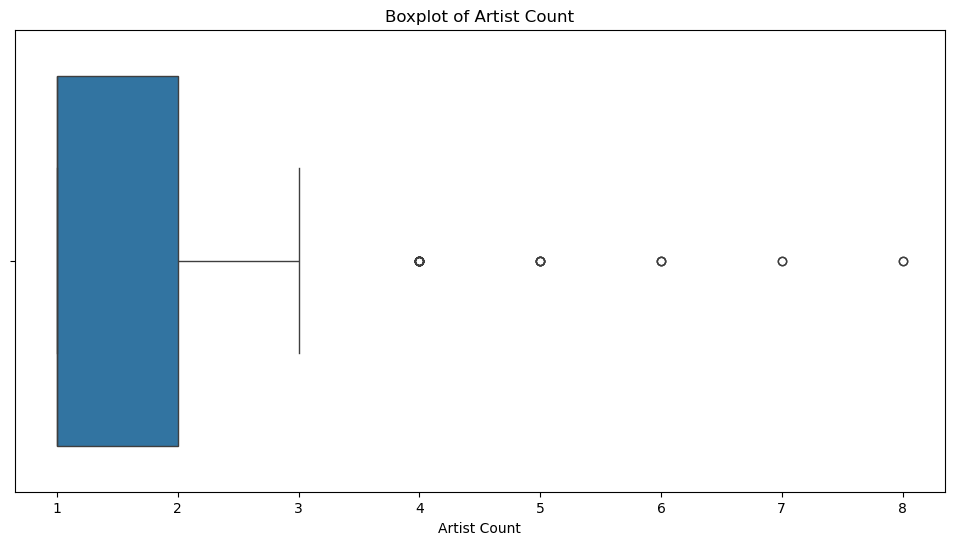

In [13]:
#Creates a boxplot about the distribution of artist count per track to see the outliers.
plt.figure(figsize = (12, 6))
sns.boxplot(x=data['artist_count'])
plt.title('Boxplot of Artist Count')
plt.xlabel('Artist Count')

# Top Performers

In this section, the most streamed tracks and the artists with the most releases are analyzed. Tracks that garnered the highest popularity and the artists who are the most prolific based on the number of tracks they released are identified. Accordingly, the main functions used in order to get the desired answers are 'data[['track_name', 'streams']].sort_values(by = 'streams', ascending = False).head(5)' and 'data['artist(s)_name'].value_counts().head(5)'.

In [14]:
#Displays the "Top 5 Most Streamed Tracks".
print("Top 5 Most Streamed Tracks")

#Sorts the data frame by streams in descending order and display the first 5 rows only.
data[['track_name', 'streams']].sort_values(by = 'streams', ascending = False).head(5)

Top 5 Most Streamed Tracks


,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


In [15]:
#Displays the top 5 most frequent artists based on track count.
print("Top 5 Most Frequent Artists\n")

#Counts the occurences of each artist in 'artist(s)_name' column and displays the first 5 rows.
top_artists = data['artist(s)_name'].value_counts().head(5)

#Displays the top 5 most frequent artist and the number of tracks they have through the use of for loop.
for artist, count in top_artists.items():
    print(artist, ':', count, 'tracks')

Top 5 Most Frequent Artists

Taylor Swift : 34 tracks
The Weeknd : 22 tracks
Bad Bunny : 19 tracks
SZA : 19 tracks
Harry Styles : 17 tracks


# Temporal Trends

In this part, insights about how music release patterns have changed over time are gained. Moreover, release patterns by month revealed trends such as which months are the tracks typically released. Accordingly, the main functions used to analyze the trends are 'plt.figure', 'sns.lineplot', 'sns.barplot', 'plt.title', 'plt.xlabel', and 'plt.ylabel'. 

Text(0, 0.5, 'Number of Tracks')

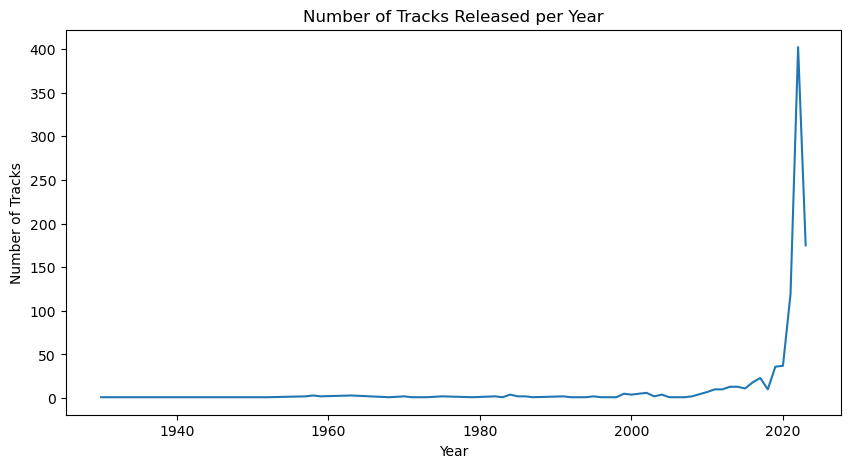

In [16]:
#Creates a figure with a specific size.
plt.figure(figsize=(10, 5))

# Counts the occurrences of each unique year in the 'released_year' column.
tracks_per_year = data['released_year'].value_counts().sort_index()

# Creates a line plot of the number of tracks released each year.
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values)
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')

Text(0, 0.5, 'Number of Tracks')

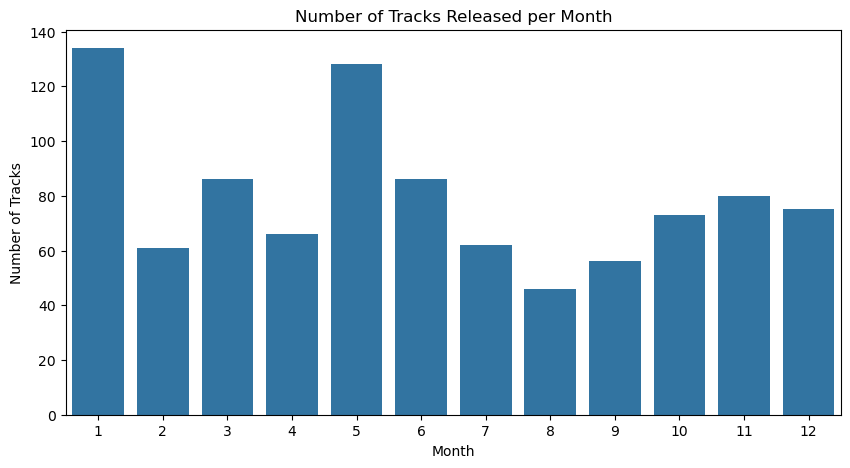

In [17]:
#Creates a figure with a specific size.
plt.figure(figsize=(10, 5))

# Counts the occurrences of each unique month in the 'released_month' column
tracks_per_month = data['released_month'].value_counts().sort_index()

# Creates a bar plot of the number of tracks released each month.
sns.barplot(x=tracks_per_month.index, y=tracks_per_month.values)
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')

# Genre and Music Characteristics

In this part, the relationship between streams and various musical arrtibutues revealed how these can contribute to a track's popularity. Additionally, the correlations between danceability, energy, valence, and acousticness provided insights into how these qualities intereact. The main functions used in this part are 'plt.figure', 'sns.heatmap', 'sns.scatterplot', 'sns.scatterplot', 'plt.title', 'plt.xlabel', and 'plt.ylabel'. 

Text(0.5, 1.0, 'Correlation Matrix of Streams and Musical Attributes')

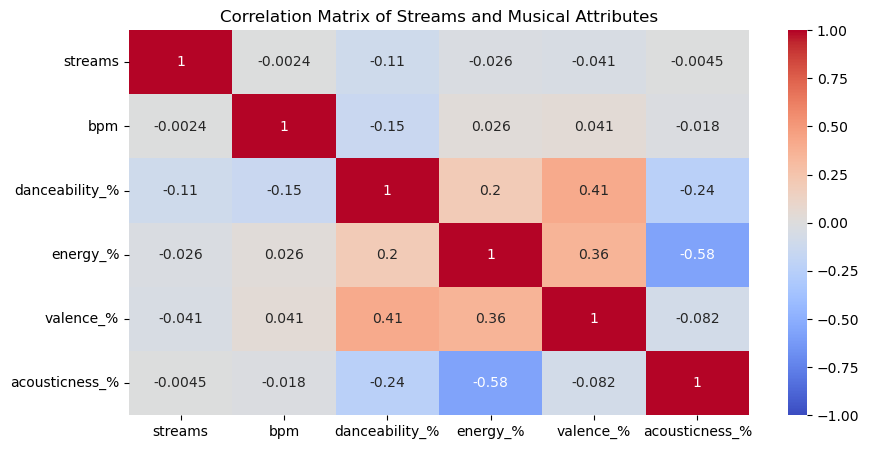

In [18]:
#Initializes a new figure with dimensions of 10 inches wide and 5 inches tall.
plt.figure(figsize = (10, 5))

#Creates a heatmap from the correlation matrix
sns.heatmap(data[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title("Correlation Matrix of Streams and Musical Attributes")

Text(0, 0.5, 'Energy %')

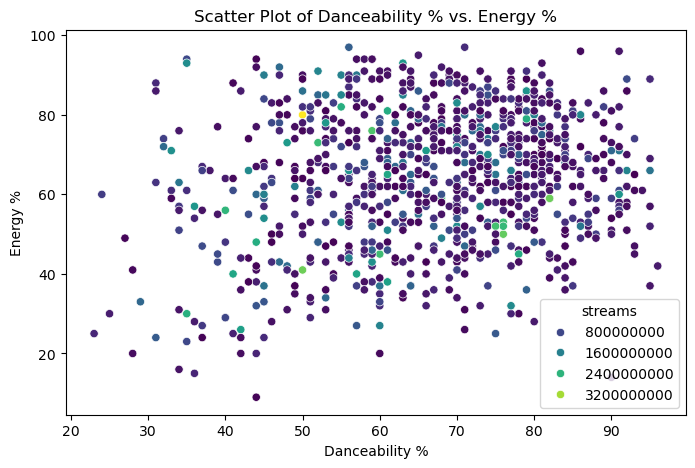

In [19]:
#Initializes a new figure with dimensions of 8 inches wide and 5 inches tall.
plt.figure(figsize = (8, 5))

#Creates a scatter plot from the data.
sns.scatterplot(x = 'danceability_%', y = 'energy_%', hue = 'streams', palette = 'viridis', data = data)
plt.title("Scatter Plot of Danceability % vs. Energy %")
plt.xlabel("Danceability %")
plt.ylabel("Energy %")

Text(0, 0.5, 'Acousticness %')

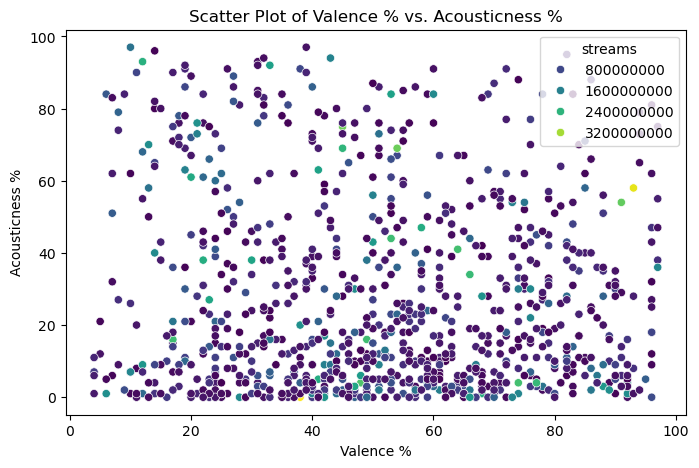

In [20]:
#Initializes a new figure with dimensions of 8 inches wide and 5 inches tall.
plt.figure(figsize = (8, 5))

#Creates a scatter plot from the data.
sns.scatterplot(x = 'valence_%', y = 'acousticness_%', hue = 'streams', palette = 'viridis', data = data)
plt.title("Scatter Plot of Valence % vs. Acousticness %")
plt.xlabel("Valence %")
plt.ylabel("Acousticness %")

# Platform Popularity

In this section, the number of tracks in Spotify, Deezer, and Apple playlists are compared. By analyzing the playlist counts across platforms, the platform which tends to include more popular tracks are identified. Accordingly, a bar plot is used to analyze the platform popularity.

Text(0, 0.5, 'Number of Tracks')

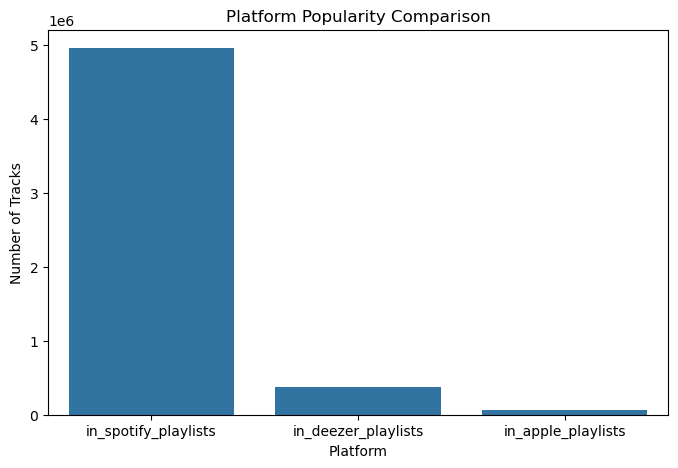

In [21]:
#The total counts of tracks on each platform are added and stored in the variable "platform_counts".
platform_counts = data[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum()

#Initializes a new figure with dimensions of 8 inches wide and 5 inches tall.
plt.figure(figsize=(8, 5))

#Creating a bar plot from the data.
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Platform Popularity Comparison')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')

# Advanced Analysis

In this last part, musical features like key and mode are examined to see whether there are preferences for certain tonalities. Moreover, genre and occurences of artist in playlists or charts are observed to help identify which genre or artist have a stronger platform presence.

Text(0, 0.5, 'Average Streams')

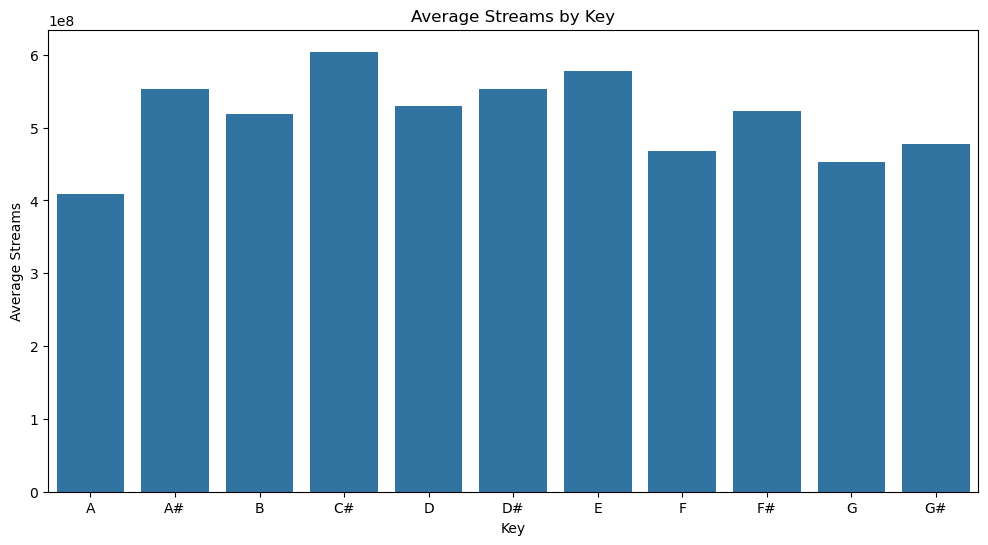

In [22]:
#Calculate the average streams for each key.
avg_streams_by_key = data.groupby('key')['streams'].mean().reset_index()

#Displays the key and not numerics.
graphkey_data = avg_streams_by_key
graphkey_data['key'] = avg_streams_by_key['key'].astype(str)

#Initializes a new figure with dimensions of 8 inches wide and 5 inches tall.
plt.figure(figsize=(12, 6))

#Creates a bar plot the average streams by key using numeric keys.
sns.barplot(data=avg_streams_by_key, x='key', y='streams')
plt.title('Average Streams by Key')
plt.xlabel('Key')
plt.ylabel('Average Streams')

Text(0, 0.5, 'Average Streams')

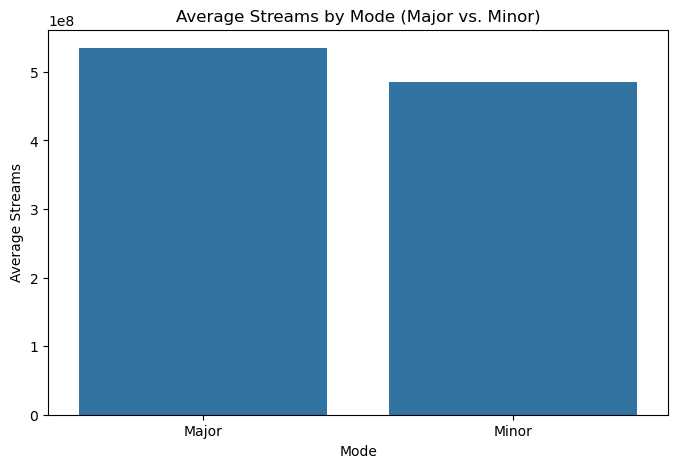

In [25]:
#Calculate average streams by mode
streams_by_mode = data.groupby('mode')['streams'].mean().reset_index()

#Initializes a new figure with dimensions of 8 inches wide and 5 inches tall.
plt.figure(figsize = (8, 5))

#Creates a bar plot about the average streams by mode.
sns.barplot(data=streams_by_mode, x = 'mode', y = 'streams')
plt.title('Average Streams by Mode (Major vs. Minor)')
plt.xlabel('Mode')
plt.ylabel('Average Streams')

Text(0, 0.5, 'Artist')

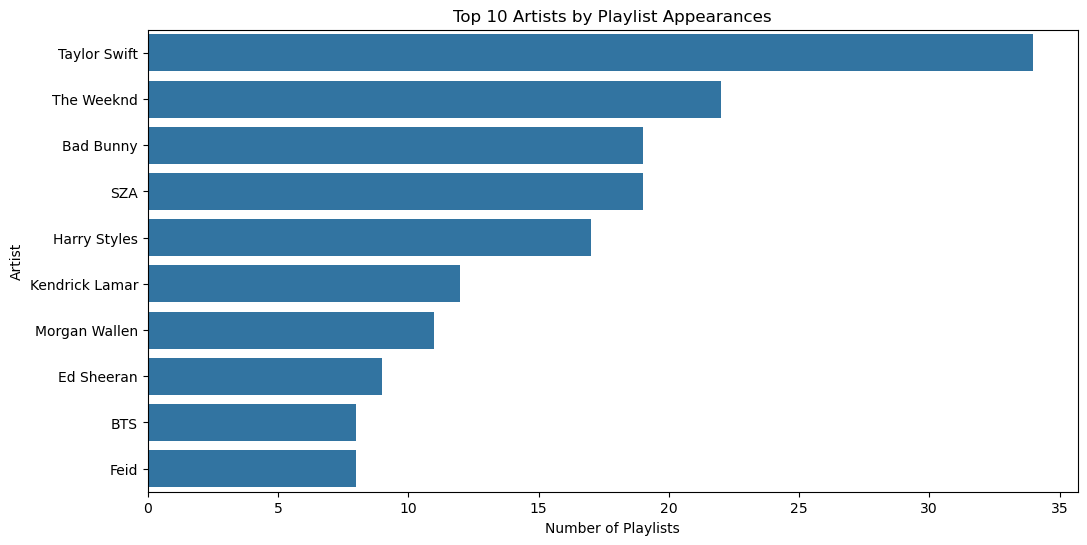

In [24]:
#Count how many playlists each artist appears in.
artist_playlist_counts = data['artist(s)_name'].value_counts().reset_index()
artist_playlist_counts.columns = ['artist', 'playlist_count']

#Returns the top 10 artists based on playlist appearances.
top_artists_playlists = artist_playlist_counts.head(10)

#Creates a bar plot about the top 10 artist.
plt.figure(figsize=(12, 6))
sns.barplot(x='playlist_count', y='artist', data=top_artists_playlists)
plt.title('Top 10 Artists by Playlist Appearances')
plt.xlabel('Number of Playlists')
plt.ylabel('Artist')